### Change problem

- **Input:** Integer $m$ money and positive integers $c_1, c_2, ...$ representing the denomination of coins
- **Output:** Minimum number of coins using the denominations to get $m$

- We covered this using the greedy algorithm, and we studied why this doesn't always work
    - Imagine having denominations [1,5,8], and we want to get $m=10$
    - Greedy approach gives us [8,1,1] = 3 coins
    - Optimal approach is [5,5] = 2 coins

- Can we try a recursive algorithm instead?
    - Let's assume denominations [1,5,6] and $m=9$
    - Let's assume we have a function `MinNumCoins` that returns the minimum count of coins to make up $m=9$
    - Notice that $\text{MinNumCoins}(9) = \min \begin{Bmatrix} \text{MinNumCoins}(8) + 1 \\ \text{MinNumCoins}(4) + 1 \\ \text{MinNumCoins}(3) + 1 \end{Bmatrix}$

- So there is a recursive solution possible:

In [21]:
import numpy as np
def min_num_coin_recurs(value: int, coins: list[int]) -> int:
    if value == 0:
        return 0
    min_num_coins = np.inf
    for denom in coins:
        if value >= denom:
            num_coins = min_num_coin_recurs(value-denom, coins) + 1
            if num_coins < min_num_coins:
                min_num_coins = num_coins
    return min_num_coins
    
min_num_coin_recurs(13, [3,6])

inf

- But there is a problem with this solution; when we get to large values of $m$, the algorithm run time is super slow! This happens because:
    1. The call tree becomes very deep, since we are basically brute forcing our way down every possible denomination
    2. We are repeating the calls to the same number multiple times
        - This is the same issue as the Fibonacci sequence; we make multiple computations for Fibonacci numbers further down the call tree

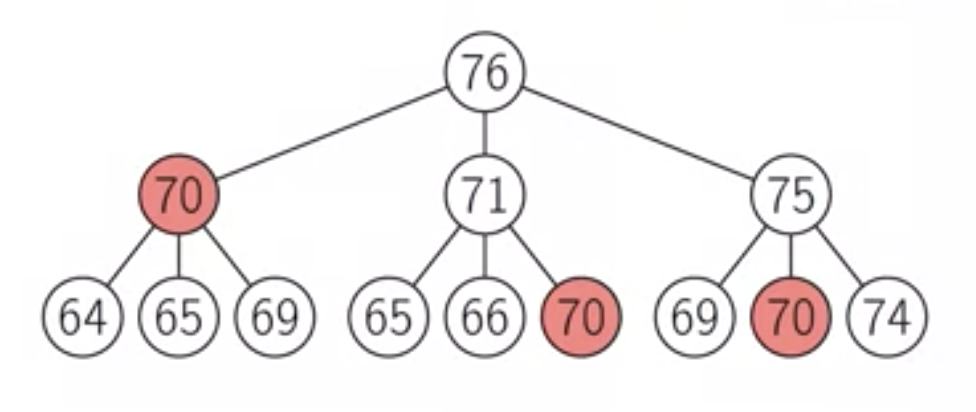

- This is where Dynamic Programming comes in
    - Effectively, nothing has changed. We are still using recursion to solve the problem
    - Except, instead of recomputing the repeat values, we store them and reference them as needed, so everything is only computed once

In [30]:
import numpy as np
store_val = {}

def min_num_coin_dp(value: int, coins: list[int]) -> int:
    '''
    Time complexity: O(value * len(coins)); we loop over all denominations for each call, and the number of recursions increases as value increases
    Space complexity: O(value); the larger your input value, the more space is needed to store intermediate computations 
    '''
    if value == 0:
        return 0
    if value in store_val:
        return store_val.get(value)
    min_num_coins = np.inf
    for denom in coins:
        if value >= denom:
            num_coins = min_num_coin_dp(value-denom, coins)
            store_val[value-denom] = num_coins
            if ((num_coins+1) < min_num_coins):
                min_num_coins = num_coins+1
    return min_num_coins
    
min_num_coin_dp(997, [2,4,8])

inf

### Puzzle: Two Rocks Game

- There are two piles of ten rocks. In each turn, you may either take one rock from a single pile, or one rock from both piles. The player that takes the last rock wins the game. Your opponent moves first.

- Approach
    - Let's represent the state of the game as a tuple $(c_1, c_2)$, which shows the count of rocks in both piles
    - Building from the end state, we know which states will result in a win, and which will result in a loss
    - Finally, we will have a lookup table for every state of the game

In [66]:
game_states = {
    (1,0): (1, 'l'),
    (0,1): (1, 'r'),
    (1,1): (1, 'b'),
}
def two_rocks(left, right):
    # print(f"{left=}, {right=}")

    if left < 0:
        return (1, '')
    if right < 0:
        return (1, '')

    if (left,right) in game_states:
        return game_states.get((left, right))
    
    game_states[(left-1, right)] = two_rocks(left-1, right)
    game_states[(left, right-1)] = two_rocks(left, right-1)
    game_states[(left-1, right-1)] = two_rocks(left-1, right-1)

    # print(game_states)
    winning_action = ''
    if (game_states.get((left-1, right))[0] == -1):
        winning_action += 'l'
    if (game_states.get((left, right-1))[0] == -1):
        winning_action += 'r'
    if (game_states.get((left-1, right-1))[0] == -1):
        winning_action += 'b'
    
    if winning_action != '':
        game_states[(left, right)] = (-1, winning_action)
        return (1, winning_action)
    else:
        game_states[(left, right)] = (1, winning_action)
        return (-1, winning_action)
    
two_rocks(1,4)
# game_states

(1, 'l')

### Puzzle: Three Rocks Game

- There are two piles of ten rocks. In each turn, you may take up to three rocks. The player that takes the last rock wins the game. Your opponent moves first.

- Approach
    - No need for DP here. Since there is no restriction in the combinations that you can take, all that matters is the count of rocks remaining. 
    - With 1,2,3 rocks left, you win. 
    - With 4 rocks left, you lose, because no matter what you do, your opponent gets a winning state of 1,2,3
    - So that means for 5,6,7 you win, because you can take 1/2/3 to give your opponent 4 rocks
    - Generalising, every multiple of 4 is a losing state
    - So just take however many you need such that your opponent always ends up with a multiple of 4